In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kpmg-data-set/KPMG_VI_New_raw_data_update_final (1).xlsx


1.Targeting high value customers using customer demographics and attributes
2.Data analytics, Customer segmentation
3.understanding the data distributions, feature engineering, data transformations
4 modelling
5results interpretation

In [23]:
# Libraries download
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
import squarify
#plt.rcParams.update({'font.size': 14})


# **Data Preprocessing and Cleaning**

**Preparation of potential customers**

# Preparing Demographic sheet

In [24]:
df_demographic=pd.read_excel('/kaggle/input/kpmg-data-set/KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name='CustomerDemographic',index_col=0,header=1,dtype={'DOB': 'datetime64[ns]'})
df_demographic.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [25]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           4000 non-null   object        
 1   last_name                            3875 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3494 non-null   object        
 6   job_industry_category                3344 non-null   object        
 7   wealth_segment                       4000 non-null   object        
 8   deceased_indicator                   4000 non-null   object        
 9   default                              3698 non-null   object        
 10  owns_car    

In [26]:
# Drop columns
df_demographic = df_demographic.drop(['first_name', 'last_name' ,'deceased_indicator','default', 'job_title'], axis=1)
# Cleaning columns
df_demographic.gender.replace({ 'Female':'F', 'Femal':'F', 'Male': 'M'},inplace=True)
df_demographic['owns_car'].replace({'Yes': 1,'No': 0}, inplace=True)
# Cleaning outlier by subsetting
df_demographic = df_demographic[df_demographic['DOB'] != df_demographic.DOB.min()]
#Cleaning missing values
df_demographic = df_demographic.dropna()
df_demographic.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,F,93,1953-10-12,Health,Mass Customer,1,11.0
2,M,81,1980-12-16,Financial Services,Mass Customer,1,16.0
3,M,61,1954-01-20,Property,Mass Customer,1,15.0
4,M,33,1961-10-03,IT,Mass Customer,0,7.0
6,M,35,1966-09-16,Retail,High Net Worth,1,13.0


In [27]:
#Creating age column
current_date = pd.Timestamp.now().normalize()
df_demographic['Age']=(current_date - df_demographic['DOB']) // pd.Timedelta(days=365.2425)

**There are slightly more women than men in this data set. They will perhaps be a significant element in our customer segmentation efforts later**.
**********


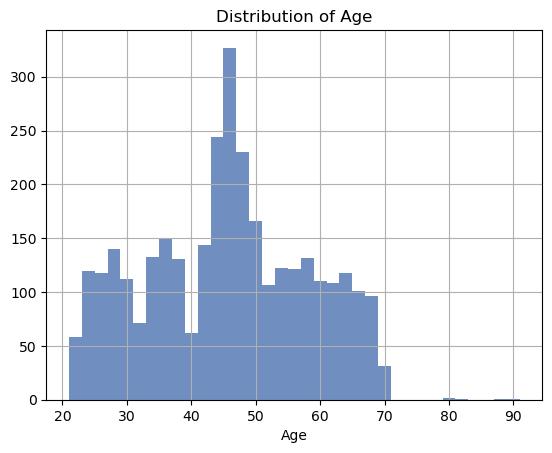

In [28]:
# Histogram for age distribution
df_demographic.hist('Age', bins=35, alpha=0.8)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.savefig('test6.png')

**The ages are mostly between 25 and 68. The average age was around 45.  Helps further in seperating age groups**

In [29]:
from IPython.display import FileLink
FileLink(r'test6.png')

/kaggle/working/test6.png

In [30]:
#Creating age groups

bins = [18,30,40,50,70,90]
labels = ['18-25','25-39','40-59','60-74','75+']
df_demographic['Age_Group'] = pd.cut(df_demographic['Age'], bins=bins, labels=labels)


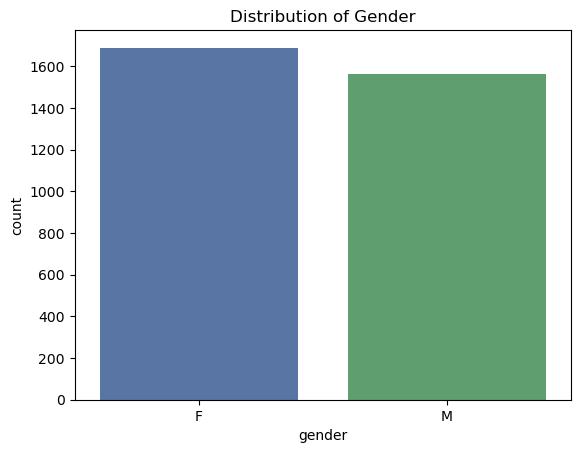

In [31]:
sns.countplot(x='gender', data=df_demographic);
plt.title('Distribution of Gender');

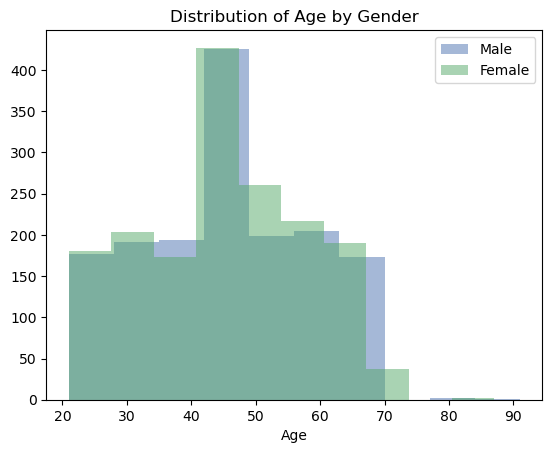

In [32]:
#Histogram for age distribution by gender
plt.savefig('test.png')
plt.hist('Age', data=df_demographic[df_demographic['gender'] == 'M'], alpha=0.5, label='Male')
plt.hist('Age',data=df_demographic[df_demographic['gender'] == 'F'], alpha=0.5, label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()
plt.savefig('test7.png')

In [33]:
from IPython.display import FileLink
FileLink(r'test7.png')

/kaggle/working/test7.png

Text(0.5, 1.0, 'Distribution of Spending Score by Age Group')

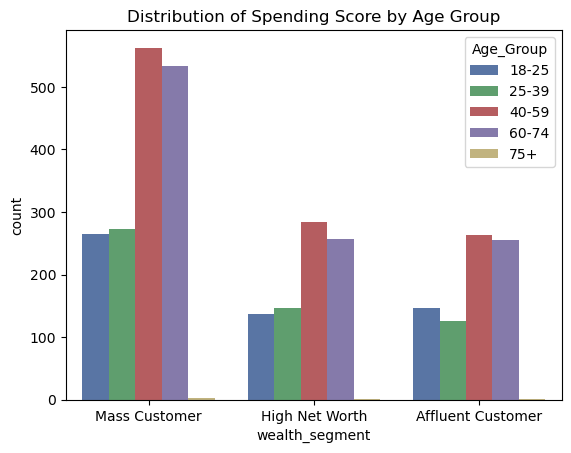

In [34]:
#Distribution of spending score by age group
sns.countplot(x="wealth_segment", hue="Age_Group", data=df_demographic)
plt.title('Distribution of Spending Score by Age Group')

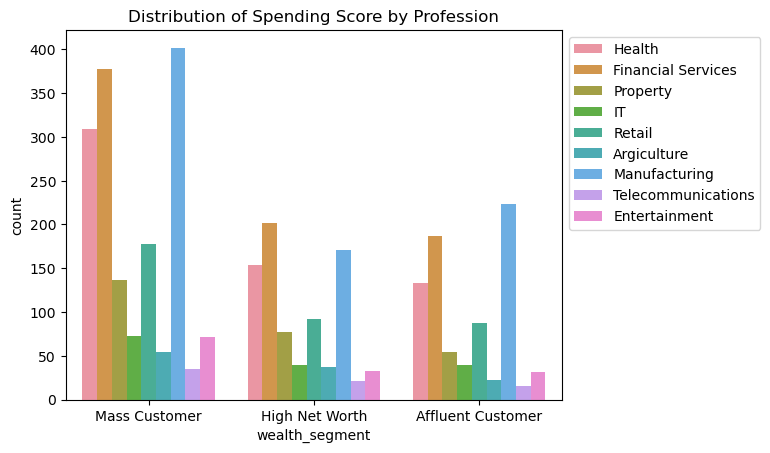

In [35]:
#Distribution of spending score by profession
sns.countplot(x="wealth_segment", hue="job_industry_category", data=df_demographic);
plt.title('Distribution of Spending Score by Profession')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

In Mass and Affluent customers category  manufacturing customers are  higher  followed by finance customers
In high net woth category finncial customers are higher than manufacturing customers.

In [36]:
df_address= pd.read_excel('/kaggle/input/kpmg-data-set/KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name='CustomerAddress',header=1,index_col=0)
df_address

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...
3999,1482 Hauk Trail,3064,VIC,Australia,3
4000,57042 Village Green Point,4511,QLD,Australia,6
4001,87 Crescent Oaks Alley,2756,NSW,Australia,10


In [37]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4003
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   address             3999 non-null   object
 1   postcode            3999 non-null   int64 
 2   state               3999 non-null   object
 3   country             3999 non-null   object
 4   property_valuation  3999 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 187.5+ KB


In [38]:
# Cleaning columns
df_address['state'].replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True)
#No duplicates and null values

In [39]:
# Merging the dataframes
df_demo_addr = pd.merge(df_demographic,df_address , on='customer_id')
df_demo_addr= df_demo_addr.dropna()
df_demo_addr

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,Age,Age_Group,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,
1,F,93,1953-10-12,Health,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
2,M,81,1980-12-16,Financial Services,Mass Customer,1,16.0,42,40-59,6 Meadow Vale Court,2153,NSW,Australia,10
4,M,33,1961-10-03,IT,Mass Customer,0,7.0,61,60-74,0 Holy Cross Court,4211,QLD,Australia,9
6,M,35,1966-09-16,Retail,High Net Worth,1,13.0,56,60-74,9 Oakridge Court,3216,VIC,Australia,9
7,F,6,1976-02-23,Financial Services,Affluent Customer,1,11.0,47,40-59,4 Delaware Trail,2210,NSW,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,F,5,1989-04-07,Manufacturing,Affluent Customer,0,12.0,34,25-39,2918 Summer Ridge Hill,3030,VIC,Australia,2
3995,M,93,1975-12-12,Manufacturing,Mass Customer,1,14.0,47,40-59,613 Erie Lane,2088,NSW,Australia,12
3996,F,8,1975-08-09,Health,Mass Customer,0,19.0,47,40-59,0 Transport Center,3977,VIC,Australia,6


**New South Wales customers could be our high value customer category** 

In [40]:
df_transactions=pd.read_excel('/kaggle/input/kpmg-data-set/KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name='Transactions',header=1)
# Sorting  as per primary key
df_transactions = df_transactions.sort_values('customer_id')
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [41]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 14485 to 17468
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  198

Missing values in five columns   where the data lack completeness

In [42]:
# Checking duplicates
df_transactions.duplicated().value_counts()

False    20000
dtype: int64

In [43]:


# Converting datatype to datetime   
df_transactions[['product_first_sold_date','transaction_date']]  =df_transactions[['product_first_sold_date','transaction_date']] .apply(pd.to_datetime)
df_transactions['product_first_sold_date']=df_transactions['product_first_sold_date'].dt.date

#Dropping the null rows
df_transactions.dropna(axis=0,inplace=True)


 
# Cleaning the data for Approved sales
df_transactions = df_transactions.query("order_status == ['Approved']")

In [44]:
df_transactions.shape

(19273, 13)

In [45]:
#Month column created
df_transactions['month'] = df_transactions['transaction_date'].dt.month

In [46]:
# RFM calculation fields
recent_purchase = df_transactions['transaction_date'].max()
df_transactions['last_purchase_days_ago'] = recent_purchase - df_transactions['transaction_date']
df_transactions['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
df_transactions['profit'] = df_transactions['list_price'] - df_transactions['standard_cost']
df_transactions.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month,last_purchase_days_ago,profit
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1970-01-01,3,278.0,75.75
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01,3,276.0,509.97
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,1970-01-01,12,21.0,75.14
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01,5,233.0,189.28
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,2,312.0,17.87
93,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01,12,7.0,110.56
14930,14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,1970-01-01,12,16.0,57.73
3764,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01,4,268.0,751.02
9784,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01,1,359.0,90.10
15662,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,1970-01-01,6,209.0,431.33


In [47]:
profit_by_month = df_transactions.groupby('month')['profit'].sum()
profit_by_month

month
1     904893.869988
2     851637.740000
3     860463.960000
4     879340.040000
5     895150.250000
6     831655.670000
7     913216.650000
8     944061.900000
9     835514.830000
10    959983.134984
11    890574.740000
12    866156.080000
Name: profit, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


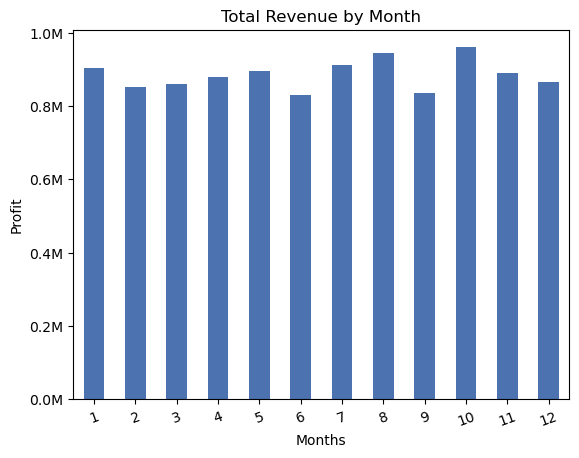

In [48]:
profit_by_month = df_transactions.groupby('month')['profit'].sum().plot(kind='bar', title="Total Revenue by Month")

plt.ticklabel_format(axis='y', style='plain', useOffset=False)
profit_by_month.set_yticklabels(['{:.1f}M'.format(x/1000000) for x in profit_by_month.get_yticks()])
plt.xticks(rotation=20)

# Add labels to the chart
profit_by_month.set_xlabel("Months")
profit_by_month.set_ylabel("Profit")
plt.savefig('test8.png')

In [49]:
from IPython.display import FileLink
FileLink(r'test8.png')

/kaggle/working/test8.png

In [50]:
df_transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,month,last_purchase_days_ago,profit
count,19273.000000,19273.000000,19273.000000,19273.000000,19273.000000,19273.000000,19273.000000,19273.000000,19273.000000
mean,9994.783324,45.776838,1739.545738,0.500285,1107.062193,555.375955,6.517200,181.394593,551.686238
std,5780.372664,30.580267,1011.845427,0.500013,582.846190,405.560271,3.449591,105.379314,493.268806
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,1.000000,0.000000,4.800000
25%,4978.000000,18.000000,857.000000,0.000000,575.270000,215.140000,4.000000,89.000000,133.780000
50%,9993.000000,45.000000,1740.000000,1.000000,1163.890000,507.580000,7.000000,180.000000,445.210000
75%,15006.000000,72.000000,2615.000000,1.000000,1635.300000,795.100000,10.000000,273.000000,830.240000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,12.000000,363.000000,1702.550000


# Creating RFM segment

In [51]:
#RFM Table generation
df_rfm = df_transactions.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

df_rfm.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary'
    }, inplace=True
)

df_rfm.head()

,recency,frequency,monetary
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


**If the customer bought in recent past, he gets higher points. If he bought many times, he gets higher score. And if he spent a lot of money, he gets more points.**

In [52]:
#RFM Labels generation
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)
# Create recency quartiles
df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype(int)
# Create frequency quartiles
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], q=5, labels=f_labels).astype(int)
# Create monetary value quartiles
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype(int)
# Combine the quartiles into a single column
df_rfm['rfm_sum'] = df_rfm['r_score'].map(str) + df_rfm['f_score'] .map(str)+ df_rfm['m_score'].map(str)
df_rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_sum
customer_id,,,,,,,
1,7.0,11,3018.09,5,5,3,553
2,128.0,3,2226.26,1,1,2,112
3,102.0,7,3290.21,2,4,4,244
4,195.0,2,220.57,1,1,1,111
5,16.0,6,2394.94,4,3,2,432


In [53]:
df_rfm.rfm_sum.value_counts()

111    236
555    128
211    121
455    111
112     98
      ... 
341      2
415      2
441      1
351      1
115      1
Name: rfm_sum, Length: 119, dtype: int64

RFM Customer Segments

Champions - bought recently, buy often and spend the most

Loyal Customers - spend good money and often

Potential Loyalist - recent customers, but spent a good amount and bought more than once

New Customers - bought most recently, but not often

Promising - recent shoppers, but haven’t spent much

Needing Attention - above average recency, frequency and monetary values; may not have bought very recently though

About To Sleep - below average recency, frequency and monetary values; will lose them if not reactivated

At Risk - spent big money and purchased often but long time ago; need to bring them back

Can't Loose Them - made biggest purchases, and often but haven’t returned for a long time

Hibernating - last purchase was long back, low spenders and low number of orders

In [54]:
# Customer segmentation 
def assign_label(df, r_rule, fm_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1]))
            & (df['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

In [55]:
# Assign segment labels based on the RFM score
df_rfm['rfm_label'] = ''

df_rfm = assign_label(df_rfm, (5,5), (4,5), 'champions')
df_rfm = assign_label(df_rfm, (3,4), (4,5), 'loyal customers')
df_rfm = assign_label(df_rfm, (4,5), (2,3), 'potential loyalist')
df_rfm = assign_label(df_rfm, (5,5), (1,1), 'new customers')
df_rfm = assign_label(df_rfm, (4,4), (1,1), 'promising')
df_rfm = assign_label(df_rfm, (3,3), (3,3), 'needing attention')
df_rfm = assign_label(df_rfm, (3,3), (1,2), 'about to sleep')
df_rfm = assign_label(df_rfm, (1,2), (3,4), 'at risk')
df_rfm = assign_label(df_rfm, (1,2), (5,5), 'cant loose them')
df_rfm = assign_label(df_rfm, (1,2), (1,2), 'hibernating')

In [56]:
len(df_rfm),

(3490,)

In [57]:
df_rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_sum,rfm_label
customer_id,,,,,,,,
1,7.0,11,3018.09,5,5,3,553,champions
2,128.0,3,2226.26,1,1,2,112,hibernating
3,102.0,7,3290.21,2,4,4,244,at risk
4,195.0,2,220.57,1,1,1,111,hibernating
5,16.0,6,2394.94,4,3,2,432,potential loyalist


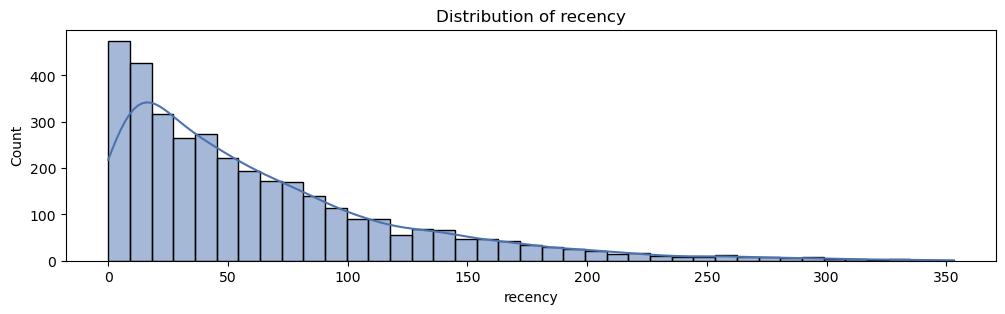

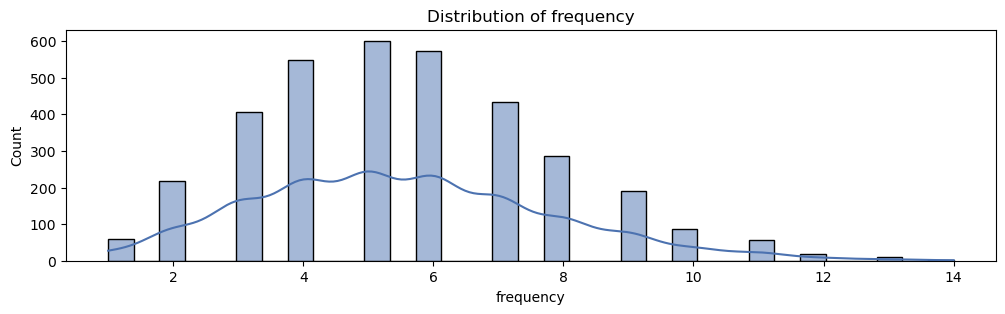

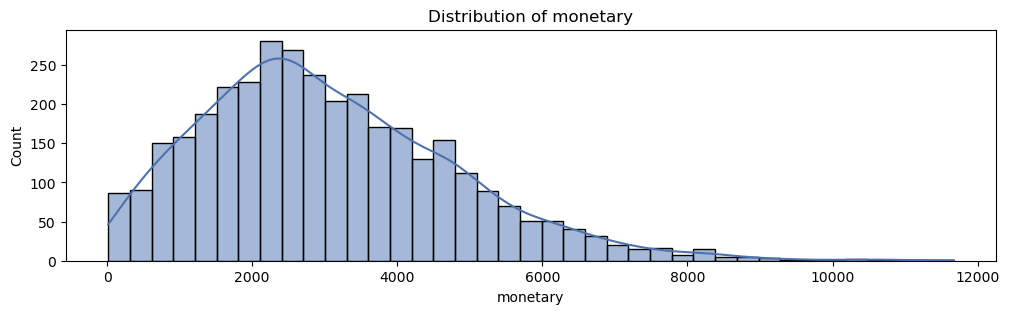

In [58]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.histplot(df_rfm[col],kde=True,stat='count')
    ax.set_title('Distribution of %s' % col)
    plt.show()

Recency distribution is right-skewed, showing that the majority of customers made a purchase in the recent past. It has a long tail containing single customers who made their orders long time ago.

 Frequency distribution chart reveals that there is a large gap between each purchase .When it comes to monetary,majority of customers have  spent good  amount of money.


RFM Customer Segments

Champions - bought recently, buy often and spend the most

Loyal Customers - spend good money and often

Potential Loyalist - recent customers, but spent a good amount and bought more than once

New Customers - bought most recently, but not often

Promising - recent shoppers, but haven’t spent much

Needing Attention - above average recency, frequency and monetary values; may not have bought very recently though

About To Sleep - below average recency, frequency and monetary values; will lose them if not reactivated

At Risk - spent big money and purchased often but long time ago; need to bring them back

Can't Loose Them - made biggest purchases, and often but haven’t returned for a long time

Hibernating - last purchase was long back, low spenders and low number of orders

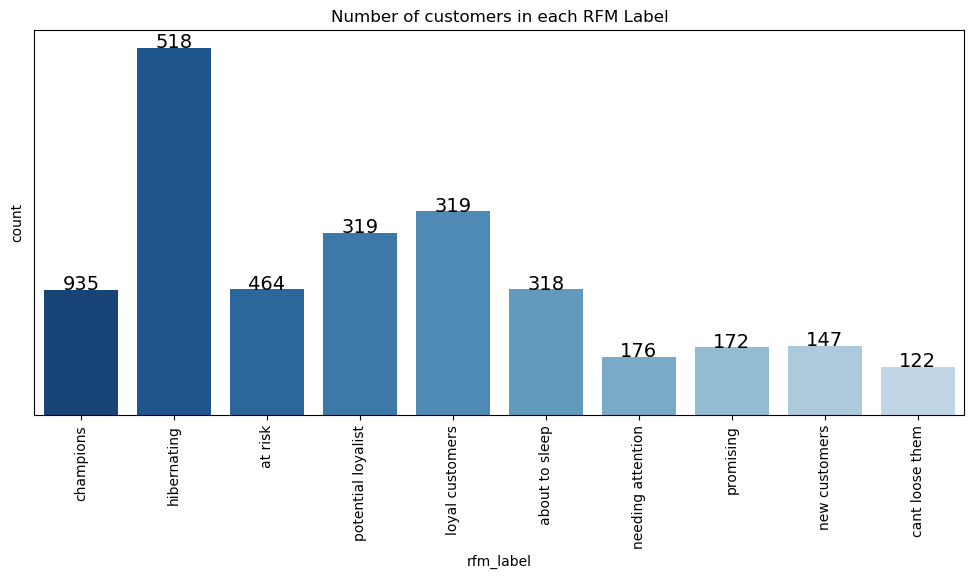

In [59]:
palette = sns.color_palette("Blues_r", n_colors=13)
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='rfm_label', data=df_rfm, palette=palette)
ax.set_title('Number of customers in each RFM Label')
tick_labels = df_rfm['rfm_label'].value_counts()
tick_positions = range(len(tick_labels))
for i, label in zip(tick_positions, tick_labels):
        rect = ax.patches[i]
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.5, label, ha='center', fontsize=14)
plt.xticks(rotation=90)
plt.yticks([])

fig.savefig('test.png', dpi=300, bbox_inches='tight')


In [60]:
from IPython.display import FileLink
FileLink(r'test.png')


/kaggle/working/test.png



Analysis of customer segments based on set of rules applied to R-F-M scores is much more diverse. It's good to see that 'loyal customers' and 'potential loyalists' constitute around 1/2 of all customers. What is more, there is strong group of 'champions' who are the most profitable customers . At the same time it should worry that group of 'hibernating' is so big . There is an opportunity that part of this group could be reactivated with a reach out campaign. Moreover, the company should focus on the group 'at risk' to increase customer retention.

In [61]:
df=pd.merge(df_transactions,df_rfm,on="customer_id")
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_purchase_days_ago,profit,recency,frequency,monetary,r_score,f_score,m_score,rfm_sum,rfm_label
0,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,278.0,75.750000,7.0,11,3018.090000,5,5,3,553,champions
1,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,...,276.0,509.970000,7.0,11,3018.090000,5,5,3,553,champions
2,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,21.0,75.140000,7.0,11,3018.090000,5,5,3,553,champions
3,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,233.0,189.280000,7.0,11,3018.090000,5,5,3,553,champions
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,312.0,17.870000,7.0,11,3018.090000,5,5,3,553,champions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19268,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,...,249.0,17.870000,144.0,6,1785.860000,1,3,2,132,at risk
19269,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,...,317.0,827.160000,144.0,6,1785.860000,1,3,2,132,at risk
19270,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,...,84.0,104.244984,84.0,3,269.484972,2,1,1,211,hibernating
19271,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,337.0,90.100012,84.0,3,269.484972,2,1,1,211,hibernating


In [62]:
agg_dict2 = {
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = df.groupby('rfm_label').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'rfm_label': 'label', 'customer_id': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis['monetary'] = df_analysis['monetary'] / df_analysis['count']

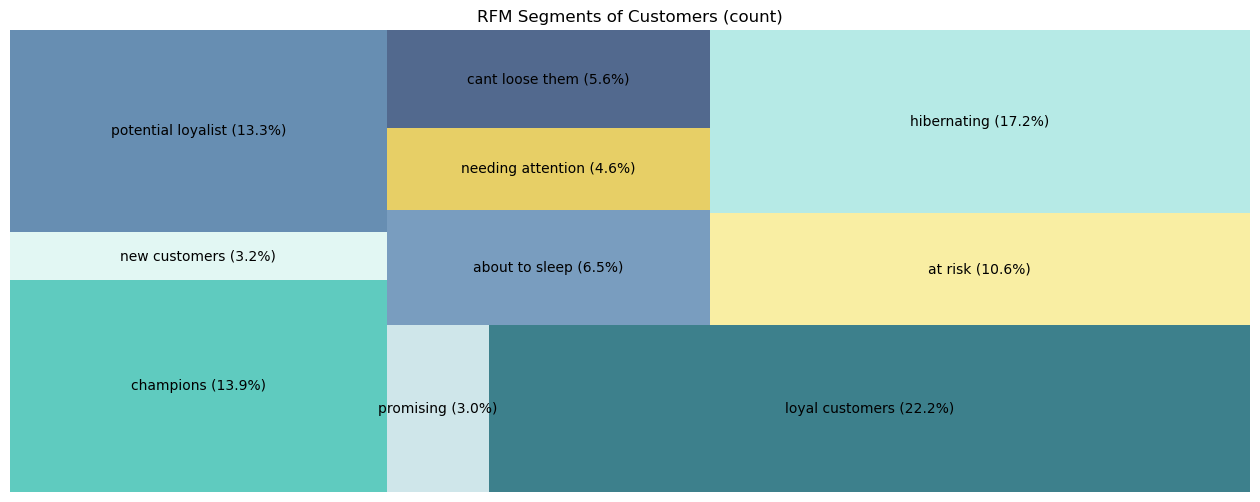

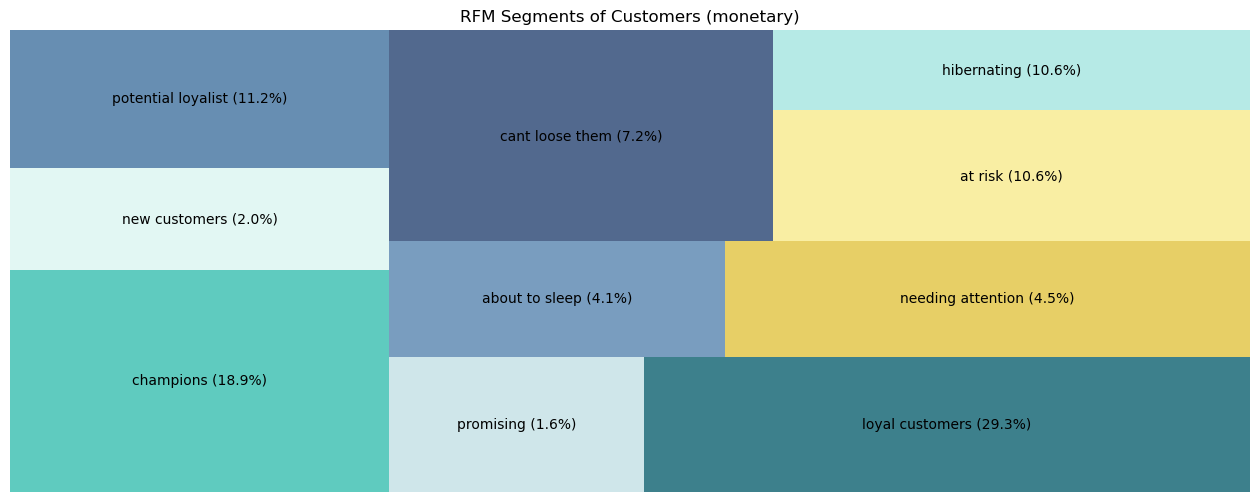

In [63]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
fig.savefig('test1.png', dpi=300, bbox_inches='tight')

**The segments champions , loyal customers and potential loyalist,promising ,cant loose them are interesting for analysis **

In [64]:
from IPython.display import FileLink
FileLink(r'test1.png')


/kaggle/working/test1.png

In [65]:
data = pd.merge(df, df_demo_addr, on="customer_id")
data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,owns_car,tenure,Age,Age_Group,address,postcode,state,country,property_valuation
0,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
1,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
2,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
3,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15688,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,...,Affluent Customer,0,17.0,55,60-74,9491 Green Ridge Terrace,2100,NSW,Australia,10
15689,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,...,Affluent Customer,0,17.0,55,60-74,9491 Green Ridge Terrace,2100,NSW,Australia,10
15690,6309,69,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Affluent Customer,0,17.0,55,60-74,9491 Green Ridge Terrace,2100,NSW,Australia,10
15691,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,...,Affluent Customer,0,17.0,55,60-74,9491 Green Ridge Terrace,2100,NSW,Australia,10


In [66]:
data.rfm_label.value_counts()

loyal customers       3485
hibernating           2695
potential loyalist    2157
champions             2105
at risk               1656
about to sleep        1030
cant loose them        879
needing attention      720
new customers          501
promising              465
Name: rfm_label, dtype: int64

# Compressing the data frame for high value customers alone

In [67]:
data = data.loc[data['rfm_label'].isin(['champions', 'potential loyalist', 'loyal customers','cant loose them','promising'])]
data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,owns_car,tenure,Age,Age_Group,address,postcode,state,country,property_valuation
0,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
1,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
2,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
3,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,1,11.0,69,60-74,060 Morning Avenue,2016,NSW,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15682,2794,62,3499,2017-01-12,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,1,7.0,43,40-59,310 Stephen Terrace,4073,QLD,Australia,9
15683,2433,44,3499,2017-02-25,1.0,Approved,WeareA2B,Standard,medium,medium,...,Mass Customer,1,7.0,43,40-59,310 Stephen Terrace,4073,QLD,Australia,9
15684,7386,57,3499,2017-03-01,1.0,Approved,WeareA2B,Touring,medium,large,...,Mass Customer,1,7.0,43,40-59,310 Stephen Terrace,4073,QLD,Australia,9
15685,747,32,3499,2017-06-21,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,1,7.0,43,40-59,310 Stephen Terrace,4073,QLD,Australia,9


# ** In depth Analysis of RFM segments **

# Which product made a good profit and where does the sale come from ?

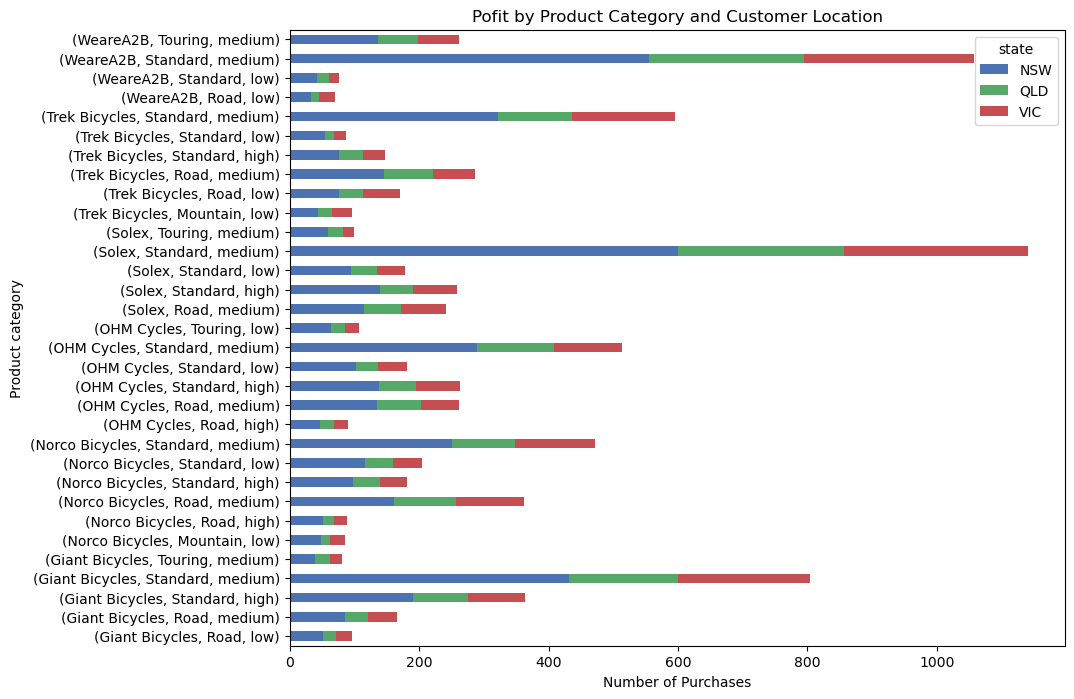

In [68]:
data_pivot = pd.pivot_table(data, values='profit', index=['brand','product_line','product_class'], columns=['state'], aggfunc=len)
# create stacked bar chart
ax= data_pivot.plot(kind='barh', stacked=True, figsize=(10,8))

# set chart title and axis labels
ax.set_title('Pofit by Product Category and Customer Location')
ax.set_xlabel('Number of Purchases')
ax.set_ylabel('Product category')

plt.savefig('test2.png', dpi=300, bbox_inches='tight')
plt.show()

The above plot clearly says Standard productline and a medium product class has more sales.

Brands Solex takes the first place . NSW state customers found to be more

In [69]:
from IPython.display import FileLink
FileLink(r'test2.png')

/kaggle/working/test2.png

#  Which Age group  and wealth segment contributed for profit?

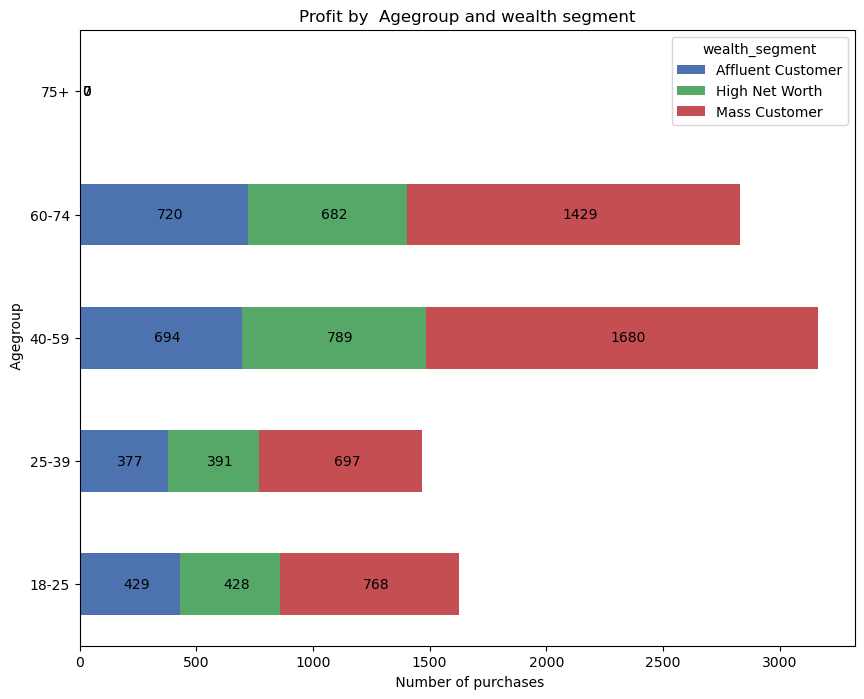

In [70]:
data_pivot = pd.pivot_table(data, values='profit', index='Age_Group', columns=['wealth_segment'], aggfunc=len)
# create stacked bar chart
ax=data_pivot.plot(kind='barh', stacked=True, figsize=(10,8))

for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=10, padding=5)

# set chart title and axis labels
plt.title('Profit by  Agegroup and wealth segment')
plt.ylabel(' Agegroup')
plt.xlabel(' Number of purchases')

plt.savefig('test3.png', dpi=300, bbox_inches='tight')

In [71]:
from IPython.display import FileLink
FileLink(r'test3.png')

/kaggle/working/test3.png


**Female customers are higher than male. Agegroup of 40-70 in mass customer segment tend to buy more**

# Ownership of car affects our profit?  Which job category buys more?

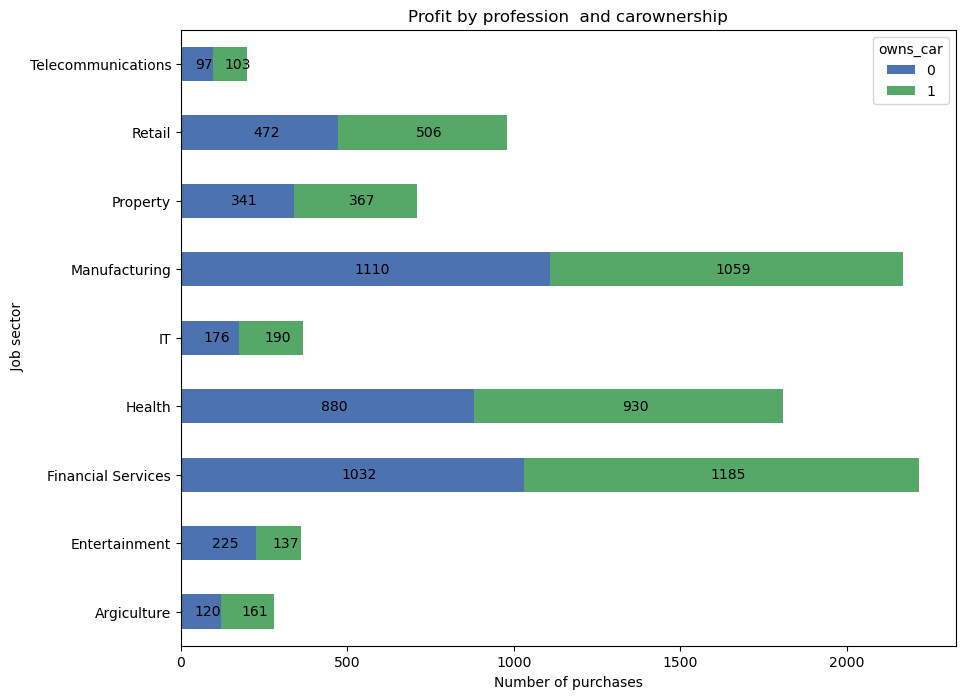

In [72]:
data_pivot = pd.pivot_table(data, values='profit', index='job_industry_category', columns=['owns_car'], aggfunc=len)
data_pivot = data_pivot.sort_values(by='job_industry_category')
# create stacked bar chart
ax=data_pivot.plot(kind='barh', stacked=True, figsize=(10,8),sort_columns=True)

for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=10, padding=5)
# set chart title and axis labels
plt.title('Profit by profession  and carownership')
plt.xlabel('Number of purchases')
plt.ylabel(' Job sector')
# show the chart
plt.show()

**Financial job sector brings more business. Ownership of car has only slight influence in the buying of cycles**.

# Recommendation of target  customers 

**Reading the new customer list**

In [73]:
df_new=pd.read_excel('/kaggle/input/kpmg-data-set/KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name='NewCustomerList',header=1,dtype={'DOB': 'datetime64[ns]'})
df_new

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997,997,0.357000


In [74]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [75]:
# Drop unknown columns
df_new = df_new.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20','job_title'],axis=1)
# Replace null values 
df_new['job_industry_category']=df_new['job_industry_category'].fillna('Unknown')


In [76]:
#Creating age column
current_date = pd.Timestamp.now().normalize()
df_new['Age']=(current_date - df_new['DOB']) // pd.Timedelta(days=365.2425)


Text(0.5, 0, 'Age')

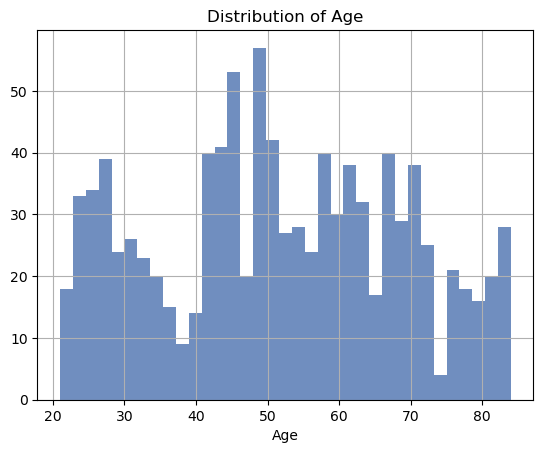

In [77]:
# Histogram for age distribution
df_new.hist('Age', bins=35, alpha=0.8)
plt.title('Distribution of Age')
plt.xlabel('Age')

# **Target customers based on Age, wealth segment, state & profession **

In [78]:
target = df_new.loc[(df_new['Age'] >= 40) & (df_new['Age'] <= 75) 
                    & (df_new['wealth_segment'] == 'Mass Customer')\
                    &(df_new['job_industry_category'].isin(['Manufacturing', 'Financial Services']))
                    &(df_new['state'] == 'NSW')
                   ]
target


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
6,Rutledge,Hallt,Male,23,1976-10-06,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875,46.0
8,Duff,Karlowicz,Male,50,1972-04-28,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.656250,50.0
20,Teddie,Burchill,Male,11,1968-12-21,Manufacturing,Mass Customer,N,Yes,13,321 Raven Plaza,2161,NSW,Australia,9,21,1.515625,54.0
55,Martelle,Tuppeny,Female,52,1981-02-03,Manufacturing,Mass Customer,N,No,9,261 Grayhawk Way,2226,NSW,Australia,10,54,1.381250,42.0
78,Chanda,Mensler,Female,15,1972-01-14,Manufacturing,Mass Customer,N,Yes,13,0 Mockingbird Plaza,2212,NSW,Australia,10,78,1.337500,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,Aleece,Feige,Female,49,1975-09-16,Manufacturing,Mass Customer,N,No,18,2030 Anderson Lane,2141,NSW,Australia,10,904,0.500000,47.0
924,Lezlie,Clemits,Female,2,1973-05-30,Financial Services,Mass Customer,N,Yes,15,0504 Nevada Drive,2155,NSW,Australia,10,924,0.488750,49.0
953,Noami,Cokly,Female,74,1962-09-17,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,60.0
960,Sonia,Dunstall,Female,0,1975-07-30,Financial Services,Mass Customer,N,No,10,99 Park Meadow Hill,2570,NSW,Australia,9,960,0.442000,47.0
